<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Autoencoders_for_Image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import cv2
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#linear Autoencoder

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

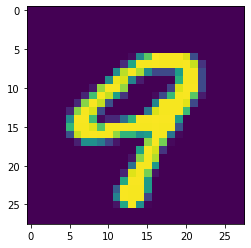

In [12]:
img = x_train[np.random.randint(len(x_train))]
plt.imshow(img)

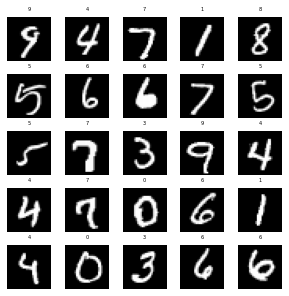

In [23]:
height = 5
width = 5
fig, axis = plt.subplots(height, width, figsize=(5, 5))
for h in range(height):
  for w in range(width):
    ind = np.random.randint(len(x_train))
    img = x_train[ind]
    axis[h][w].imshow(img, cmap='gray')
    axis[h][w].axis('off')
    axis[h][w].set_title(y_train[ind], fontsize=5)

plt.subplots_adjust(hspace=0.3)

In [30]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255
x_test = x_test.reshape(x_test.shape[0], -1) / 255

Model Sequence order
784 - 128 - 64 - 32 - 64 - 128 - 784

In [50]:
autoencoder = tf.keras.Sequential()

#Encode
autoencoder.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=784, name='Dense_1'))
autoencoder.add(tf.keras.layers.Dense(units=64, activation='relu', name='Dense_2'))
autoencoder.add(tf.keras.layers.Dense(units=32, activation='relu', name='Dense_3'))

#Decode
autoencoder.add(tf.keras.layers.Dense(units=64, activation='relu', name='Dense_4'))
autoencoder.add(tf.keras.layers.Dense(units=128, activation='relu', name='Dense_5'))
autoencoder.add(tf.keras.layers.Dense(units=784, activation='sigmoid', name='Dense_6'))


In [51]:
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 128)               100480    
                                                                 
 Dense_2 (Dense)             (None, 64)                8256      
                                                                 
 Dense_3 (Dense)             (None, 32)                2080      
                                                                 
 Dense_4 (Dense)             (None, 64)                2112      
                                                                 
 Dense_5 (Dense)             (None, 128)               8320      
                                                                 
 Dense_6 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [52]:
autoencoder.compile(optimizer='Adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [53]:
autoencoder.fit(x_train, x_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1548 - accuracy: 0.0122
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1112 - accuracy: 0.0128
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1025 - accuracy: 0.0124
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0979 - accuracy: 0.0131
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0951 - accuracy: 0.0137
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0933 - accuracy: 0.0137
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0922 - accuracy: 0.0135
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0913 - accuracy: 0.0133
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0905 - accuracy: 0.0140
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - l

###Encoder

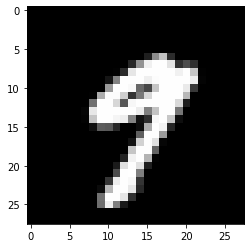

In [75]:
test_img = x_test[20]
plt.imshow(test_img.reshape(28, 28), cmap='gray')

In [56]:
encoder = tf.keras.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('Dense_3').output)

In [57]:
encoded_img = encoder.predict(test_img.reshape(1, -1))
encoded_img.shape

1/1 [==============================] - 1s 1s/step


(1, 32)

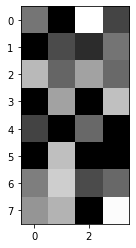

In [58]:
plt.imshow(encoded_img.reshape(8, 4), cmap='gray')

###Decoder

In [70]:
input_layer_decoder = tf.keras.layers.Input(shape=(32,))
decoder_layer1 = autoencoder.get_layer('Dense_4')
decoder_layer2 = autoencoder.get_layer('Dense_5')
decoder_layer3 = autoencoder.get_layer('Dense_6')

decoder = tf.keras.Model(inputs=input_layer_decoder, outputs=decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32)]              0         
                                                                 
 Dense_4 (Dense)             (None, 64)                2112      
                                                                 
 Dense_5 (Dense)             (None, 128)               8320      
                                                                 
 Dense_6 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [71]:
decoder_img = decoder.predict(encoded_img)
decoder_img.shape

1/1 [==============================] - 0s 41ms/step


(1, 784)

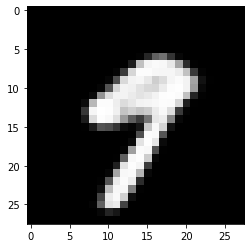

In [73]:
plt.imshow(decoder_img.reshape(28, 28), cmap='gray')

###Test

1/1 [==============================] - 0s 15ms/step


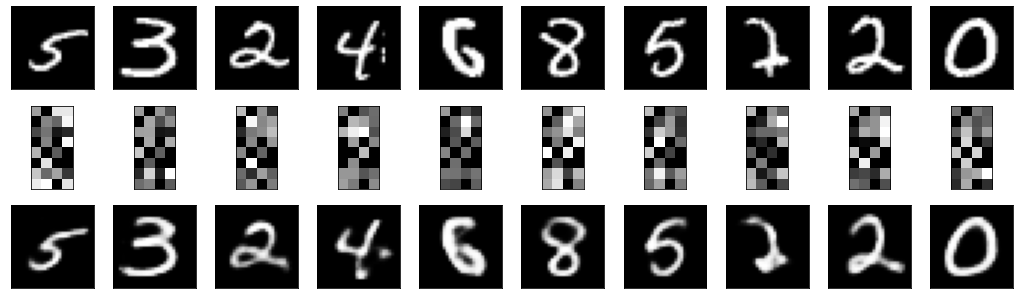

In [82]:
plt.figure(figsize=(18, 18))
n_images=10
test_imgs = np.random.randint(0, len(x_test), size=n_images)
for i, img_id in enumerate(test_imgs):
  ax = plt.subplot(10, 10, i+1)
  plt.imshow(x_test[img_id].reshape(28, 28), cmap='gray')
  plt.xticks(())
  plt.yticks(())


  ax = plt.subplot(10, 10, i+1+n_images)
  encoded_img = encoder.predict(x_test[img_id].reshape(1, -1))
  plt.imshow(encoded_img.reshape(8, 4), cmap='gray')
  plt.xticks(())
  plt.yticks(())


  ax = plt.subplot(10, 10, i+1+n_images*2)
  decoded_img = decoder.predict(encoded_img)
  plt.imshow(decoder.predict(encoded_img).reshape(28, 28), cmap='gray')
  plt.xticks(())
  plt.yticks(())


#Convolutional Autoencoder

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


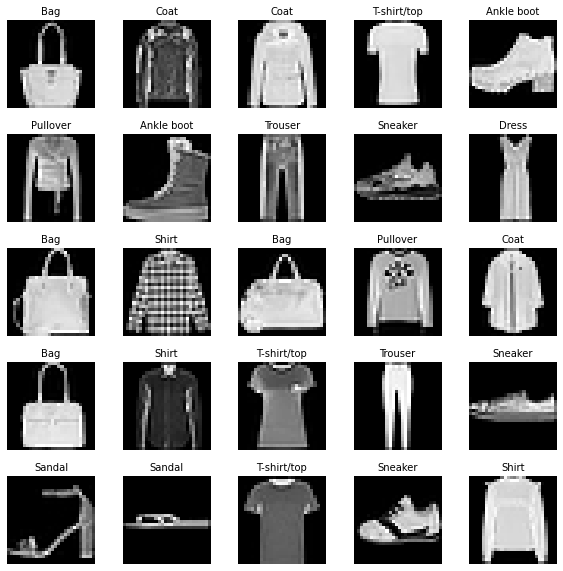

In [4]:
height = 5
width = 5
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
fig, axis = plt.subplots(height, width, figsize=(10, 10))
for h in range(height):
  for w in range(width):
    ind = np.random.randint(len(x_train))
    img = x_train[ind]
    axis[h][w].imshow(img, cmap='gray')
    axis[h][w].axis('off')
    axis[h][w].set_title(classes[y_train[ind]], fontsize=10)

plt.subplots_adjust(hspace=0.3)

In [5]:
x_train = x_train.reshape((len(x_train), 28, 28, 1)) / 255 
x_test = x_test.reshape((len(x_test), 28, 28, 1)) / 255

##Model

In [18]:
#encoder

autoencoder = tf.keras.Sequential()

autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='valid', input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.MaxPooling2D(pool_size=2))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu', padding='same', strides=2))

autoencoder.add(tf.keras.layers.Flatten())

#decoder
autoencoder.add(tf.keras.layers.Reshape((4, 4, 8)))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(tf.keras.layers.UpSampling2D(size=2))

autoencoder.add(tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(tf.keras.layers.UpSampling2D(size=2))

autoencoder.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu', padding='valid'))
autoencoder.add(tf.keras.layers.UpSampling2D(size=2))

autoencoder.add(tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='relu', padding='same'))

autoencoder.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 flatten_10 (Flatten)        (None, 128)             

In [22]:
autoencoder.compile(optimizer='Adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [23]:
autoencoder.fit(x_train, x_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 76s 40ms/step - loss: 0.3551 - accuracy: 0.5005
Epoch 2/50
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3500 - accuracy: 0.5013
Epoch 3/50
1875/1875 [==============================] - 75s 40ms/step - loss: 0.3384 - accuracy: 0.5017
Epoch 4/50
1875/1875 [==============================] - 74s 39ms/step - loss: 0.3337 - accuracy: 0.5015
Epoch 5/50
1875/1875 [==============================] - 74s 39ms/step - loss: 0.3273 - accuracy: 0.5022
Epoch 6/50
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3161 - accuracy: 0.5029
Epoch 7/50
1875/1875 [==============================] - 74s 39ms/step - loss: 0.3169 - accuracy: 0.5026
Epoch 8/50
1875/1875 [==============================] - 74s 40ms/step - loss: 0.3262 - accuracy: 0.5016
Epoch 9/50
1875/1875 [==============================] - 74s 40ms/step - loss: 0.3147 - accuracy: 0.5029
Epoch 10/50
1875/1875 [==============================] - 74s 40m

In [55]:
encoder = tf.keras.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('flatten_10').output)
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39_input (InputLayer  [(None, 28, 28, 1)]      0         
 )                                                               
                                                                 
 conv2d_39 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                           